# Caso COVID-19 Fase 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Se importa la libreria procesada en la unidad anterior

In [2]:
df = pd.read_csv('archivo_procesado.csv')
df.head()

,Country/Region,date,value,new_cases,month_year
0,Afghanistan,2020-01-22,0,0.0,2020-01
1,Afghanistan,2020-01-23,0,0.0,2020-01
2,Afghanistan,2020-01-24,0,0.0,2020-01
3,Afghanistan,2020-01-25,0,0.0,2020-01
4,Afghanistan,2020-01-26,0,0.0,2020-01


Agrupamos y sumamos los casos para dejas los casos por meses

In [4]:
monthly_cases = df.groupby(['Country/Region', 'month_year'])['new_cases'].sum().reset_index()
monthly_cases

,Country/Region,month_year,new_cases
0,Afghanistan,2020-01,0.0
1,Afghanistan,2020-02,5.0
2,Afghanistan,2020-03,161.0
3,Afghanistan,2020-04,1661.0
4,Afghanistan,2020-05,13353.0
...,...,...,...
7834,Zimbabwe,2022-11,1271.0
7835,Zimbabwe,2022-12,817.0
7836,Zimbabwe,2023-01,1625.0
7837,Zimbabwe,2023-02,2315.0


Se obtienen los casos por pais

In [5]:
total_cases_per_country = df.groupby('Country/Region')['new_cases'].sum().reset_index()
total_cases_per_country

,Country/Region,new_cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0
...,...,...
196,West Bank and Gaza,703228.0
197,Winter Olympics 2022,535.0
198,Yemen,11945.0
199,Zambia,343135.0


Se obtiene los tres paises con mas casos

In [9]:
top_countries = total_cases_per_country.nlargest(3, 'new_cases')['Country/Region']
top_countries

186        US
80      India
63     France
Name: Country/Region, dtype: object

Se filtran por esos tres paises

In [10]:
top_countries_data = monthly_cases[monthly_cases['Country/Region'].isin(top_countries)]
top_countries_data

,Country/Region,month_year,new_cases
2457,France,2020-01,5.0
2458,France,2020-02,95.0
2459,France,2020-03,52181.0
2460,France,2020-04,116580.0
2461,France,2020-05,22114.0
...,...,...,...
7288,US,2022-11,1321555.0
7289,US,2022-12,1952012.0
7290,US,2023-01,1597537.0
7291,US,2023-02,1080585.0


Se genera la gráfica

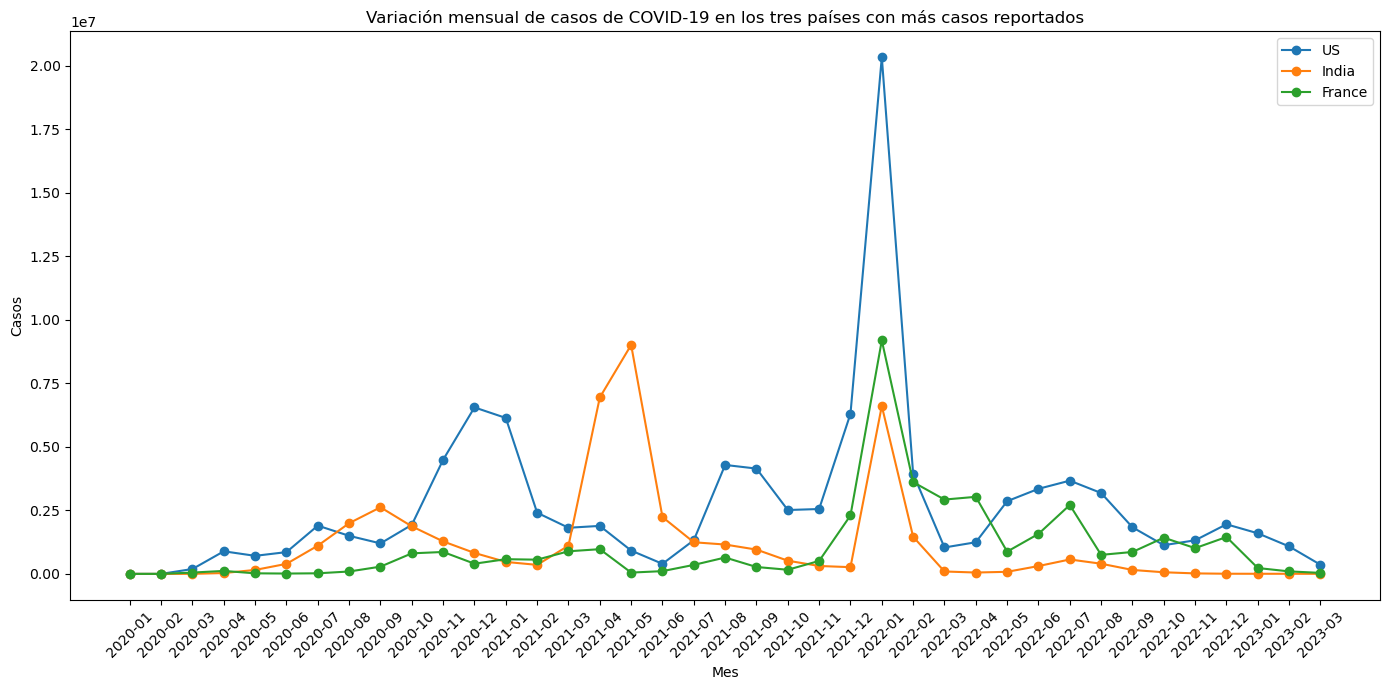

In [11]:
plt.figure(figsize=(14, 7))

for country in top_countries:
    country_data = top_countries_data[top_countries_data['Country/Region'] == country]
    plt.plot(country_data['month_year'].astype(str), country_data['new_cases'], marker='o', label=country)

plt.xlabel('Mes')
plt.ylabel('Casos')
plt.title('Variación mensual de casos de COVID-19 en los tres países con más casos reportados')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()